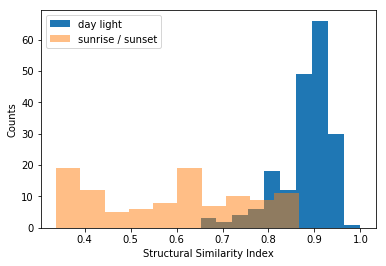

In [101]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from skimage.measure import compare_ssim as ssim

data_path = '/Users/frodo/Documents/placement/data/'
normal_data_path = data_path + 'day/'
abnormal_data_path = data_path + 'sunrise-sunset/'
image_mean_path = data_path + 'day/1514724300_0_2017-12-31-12-45-00.jpg'
image_mean = cv2.imread(image_mean_path)

score_normal = []
score_abnormal = []
clock_normal = []
clock_abnormal = []

for img in os.listdir(abnormal_data_path):
    image = cv2.imread(abnormal_data_path + img)
    score = ssim(image_mean, image, multichannel=True)
    score_abnormal.append(score)
    timestamp = img.split('-')[3] + img.split('-')[4]
    clock_abnormal.append(float(timestamp))
    
for img in os.listdir(normal_data_path):
    image = cv2.imread(normal_data_path + img)
    score = ssim(image_mean, image, multichannel=True)
    score_normal.append(score)
    timestamp = img.split('-')[3] + img.split('-')[4]
    clock_normal.append(float(timestamp))
    
abnormal_tuple = tuple(zip(clock_abnormal, score_abnormal))
normal_tuple = tuple(zip(clock_normal, score_abnormal))

plt.hist(score_normal, label='day light')
plt.hist(score_abnormal, label='sunrise / sunset', alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Structural Similarity Index')
plt.ylabel('Counts')
plt.savefig('/Users/frodo/Desktop/sunset_colour.png')

pearson corr in normal dataset  -0.06712955349858321
spearman corr in normal dataset  0.025652055057812023
pearson corr in ABnormal dataset  -0.09576578403652486
spearman corr in ABnormal dataset  -0.1071399786793573


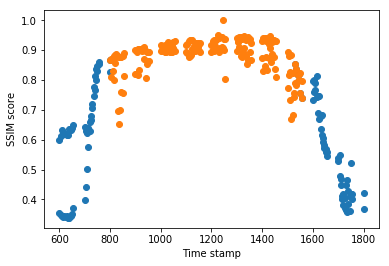

In [111]:
score_max = sorted(score_clock,key=lambda x: x[1], reverse=True)[0]
score_min = sorted(score_clock,key=lambda x: x[1], reverse=False)[0]

plt.xticks(rotation='horizontal')
plt.xlabel('Time stamp')
plt.ylabel('SSIM score')
plt.plot(clock_abnormal, score_abnormal, 'o')
plt.savefig('/Users/frodo/Desktop/ssim_vs_timestamp_sunset.png')
plt.plot(clock_normal, score_normal, 'o')
plt.savefig('/Users/frodo/Desktop/ssim_vs_timestamp_daylight.png')

from scipy.stats import pearsonr, spearmanr

normal_pc, _ = pearsonr(clock_normal, score_normal)
normal_sc, _ = spearmanr(clock_normal, score_normal)
abnormal_pc, _ = pearsonr(clock_abnormal, score_abnormal)
abnormal_sc, _ = spearmanr(clock_abnormal, score_abnormal)

print "pearson corr in normal dataset ", normal_pc
print "spearman corr in normal dataset ", normal_sc
print "pearson corr in ABnormal dataset ", abnormal_pc
print "spearman corr in ABnormal dataset ", abnormal_sc


